In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('data/amazon_cells_labelled.txt', sep='\t', names=['reviews', 'sentiments'])
df.head()

,reviews,sentiments
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
analyser = SentimentIntensityAnalyzer()
score = analyser.polarity_scores(df['reviews'][0])

In [5]:
def vader_sentiment(text):
    score = analyser.polarity_scores(text)
    if score['compound'] > 0:
        result = 1
    else:
        result = 0
    return result

def text_blob(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        result = 1
    else:
        result = 0
    return result


In [6]:
df['vader_sent'] = df['reviews'].apply(vader_sentiment)
df['textblob_sent'] = df['reviews'].apply(text_blob)

In [7]:
df.head(10)

,reviews,sentiments,vader_sent,textblob_sent
0,So there is no way for me to plug it in here i...,0,0,0
1,"Good case, Excellent value.",1,1,1
2,Great for the jawbone.,1,1,1
3,Tied to charger for conversations lasting more...,0,0,1
4,The mic is great.,1,1,1
5,I have to jiggle the plug to get it to line up...,0,0,1
6,If you have several dozen or several hundred c...,0,1,1
7,If you are Razr owner...you must have this!,1,0,0
8,"Needless to say, I wasted my money.",0,0,0
9,What a waste of money and time!.,0,0,0


In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

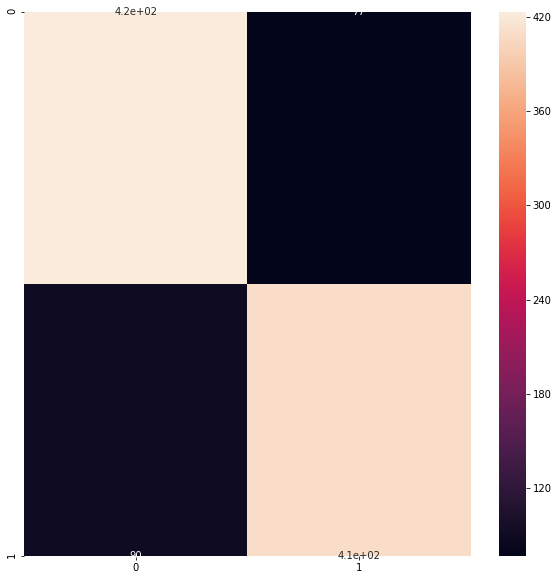

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(df['sentiments'], df['vader_sent']), annot=True)

In [10]:
confusion_matrix(df['sentiments'], df['vader_sent'])

array([[423,  77],
       [ 90, 410]])

In [11]:
confusion_matrix(df['sentiments'], df['textblob_sent'])

array([[379, 121],
       [ 83, 417]])

In [12]:
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1  import Features, EntitiesOptions, KeywordsOptions, SentimentOptions, CategoriesOptions

In [13]:
URL = "https://gateway-lon.watsonplatform.net/natural-language-understanding/api"
API = "aNAfGJImJnR8NPTOu855xFilyu396r50FuddXeHeAjQd"

natural_language_understanding = NaturalLanguageUnderstandingV1(                                         
    version='2018-11-16',
    iam_apikey= API, # Use your API key here
    url= URL # paste the url here
    )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  import sys


In [14]:
def Sentiment_score(input_text): 
    # Input text can be sentence, paragraph or document
    response = natural_language_understanding.analyze (text = input_text, features = Features(sentiment=SentimentOptions()), language='en').get_result()
    # From the response extract score which is between -1 to 1
    res = response.get('sentiment').get('document').get('score')
    return res

In [15]:
df['IBM_sentiment'] = df['reviews'].apply(Sentiment_score)

In [16]:
res = Sentiment_score(df['reviews'][0])

In [17]:
res

-0.839086

In [18]:
df.head()

,reviews,sentiments,vader_sent,textblob_sent,IBM_sentiment
0,So there is no way for me to plug it in here i...,0,0,0,-0.839086
1,"Good case, Excellent value.",1,1,1,0.989355
2,Great for the jawbone.,1,1,1,0.863524
3,Tied to charger for conversations lasting more...,0,0,1,-0.896534
4,The mic is great.,1,1,1,0.939186


In [19]:
import numpy as np
df["IBM_sentiment"] = np.where(df["IBM_sentiment"] > 0, 1, 0)

In [20]:
confusion_matrix(df['sentiments'], df['IBM_sentiment'])

array([[468,  32],
       [ 91, 409]])

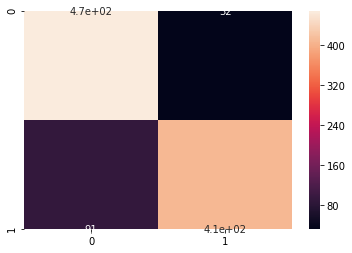

In [22]:
sns.heatmap(confusion_matrix(df['sentiments'], df['IBM_sentiment']), annot = True)

In [23]:
matrix = confusion_matrix(df['sentiments'], df['IBM_sentiment'])

In [24]:
matrix[0,1]

32

In [25]:
new_ = np.asarray(matrix).reshape(-1)

In [26]:
new

array([468,  32,  91, 409])

In [38]:
col_name = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']

In [33]:
def matrix_and_array(col1, col2):
    create_matrix = confusion_matrix(col1, col2)
    create_vector = np.asarray(create_matrix).reshape(-1)
    return list(create_vector)
    

In [34]:
ibm_vector = matrix_and_array(df['sentiments'], df['IBM_sentiment'])

In [35]:
ibm_vector

[468, 32, 91, 409]

In [36]:
vadar_vector =  matrix_and_array(df['sentiments'], df['vader_sent'])
textblob_vector =  matrix_and_array(df['sentiments'], df['textblob_sent'])

In [39]:
data = [ibm_vector, vadar_vector, textblob_vector]
index = ['IBM Watson', 'VADER', 'TextBlob']
truth = pd.DataFrame(data, columns = col_name, index = index)

In [40]:
truth

,True_Negative,False_Positive,False_Negative,True_Positive
IBM Watson,468,32,91,409
VADER,423,77,90,410
TextBlob,379,121,83,417


In [43]:
from watson_developer_cloud.natural_language_understanding_v1 import EmotionScores, EmotionOptions, EmotionResult, Features

In [44]:
emo = NaturalLanguageUnderstandingV1(                                         
    version='2018-11-16',
    iam_apikey= API, # Use your API key here
    url= URL # paste the url here
    )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  after removing the cwd from sys.path.


In [52]:
result = emo.analyze(text = df['reviews'][0], features =Features(emotion = EmotionScores()),language='en').get_result() 
res = result.get('emotion').get('document').get('emotion')

In [53]:
res

{'sadness': 0.444739,
 'joy': 0.06094,
 'fear': 0.294694,
 'disgust': 0.046315,
 'anger': 0.306821}

In [48]:
type(res)

NoneType

In [51]:
result

{'usage': {'text_units': 1, 'text_characters': 82, 'features': 1},
 'language': 'en',
 'emotion': {'document': {'emotion': {'sadness': 0.444739,
    'joy': 0.06094,
    'fear': 0.294694,
    'disgust': 0.046315,
    'anger': 0.306821}}}}